In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import kde_funcs as kde

In [5]:
from importlib import reload
reload(kde)

<module 'kde_funcs' from 'c:\\Users\\ytl_c\\OneDrive\\Desktop\\23_24 WS (Master)\\Kernel Simulations\\kde_funcs.py'>

0.01


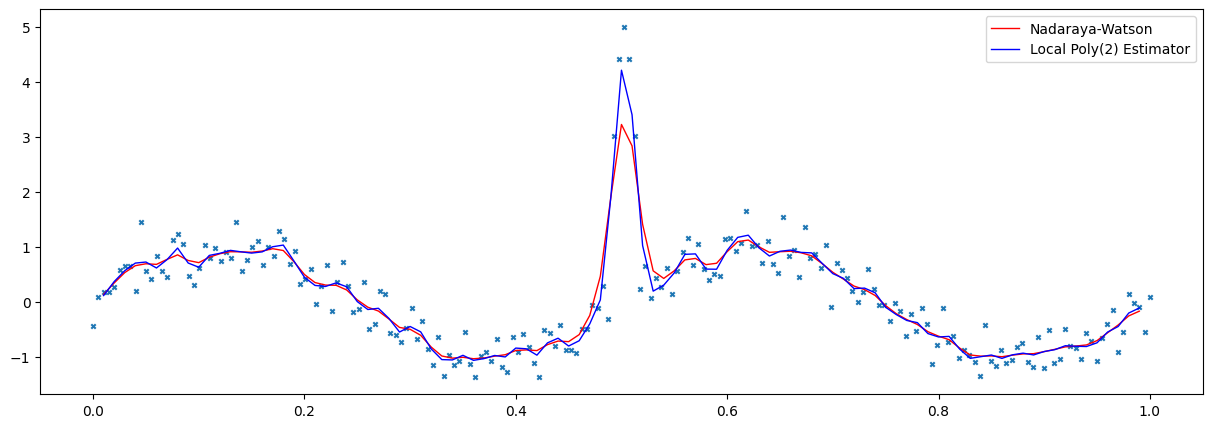

In [26]:
# create equidistant x points on [0,1]
n = 200
x_min = 0
x_max = 1
x = np.linspace(x_min, x_max, n)
y = np.sin(4 * np.pi * x) + np.random.normal(0, 0.3, n)
# y = 5 * x + 1

y_mid = len(y)//2
window_len = 2
height = 5

# Create a smooth peak at the middle of the true trend
sigma = 0.01
peak = height * np.exp(-(x - x[y_mid])**2 / (2 * sigma**2))[y_mid-window_len : y_mid+window_len+1]

y[y_mid-window_len : y_mid+window_len+1] = peak

# fit nw estimator
n_pred = 100
x_pred = np.array([k/n_pred for k in range(1,n_pred)])
# define h = elementwise min(x_pred, 1-x_pred)
h = min(np.minimum(x_pred, 1-x_pred))
print(h)
h = 0.01

order = 2
y_pred_nw = kde.nadaraya_watson(x, y, x_pred, "gauss", h)
y_pred_loclin, rest = kde.loc_polynomial_estim_wls(x, y, x_pred, "gauss", order, h)

# Plot the original data and the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=10, marker="x")
plt.plot(x_pred, y_pred_nw, color="red", lw=1, label="Nadaraya-Watson")
plt.plot(x_pred, y_pred_loclin, color="blue", lw=1, label=f"Local Poly({order}) Estimator")
plt.legend()
plt.show()